In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df_2023 = pd.read_csv("clean_halfmarathon_2023.csv")
df_2024 = pd.read_csv("clean_halfmarathon_2024.csv")

In [3]:
df = pd.concat([df_2023, df_2024], ignore_index=True)
print("Rozmiar połączonego zbioru:", df.shape)

Rozmiar połączonego zbioru: (17927, 4)


In [4]:
features = ['Płeć_encoded', 'Wiek', '5km_seconds']
target = 'total_seconds'
df = df.dropna(subset=features + [target])

In [5]:
# Przygotowanie danych
df['5km_minutes'] = df['5km_seconds'] / 60
df['halfmarathon_minutes'] = df['total_seconds'] / 60

X = df[['Płeć_encoded', 'Wiek', '5km_minutes']]
y = df['halfmarathon_minutes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Modele do porównania
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
}

In [8]:
# Trenowanie i ocena
results = []
trained_models = {}

for name, regressor in models.items():
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', regressor)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE (minuty)": round(mae, 2), "R²": round(r2, 3)})
    trained_models[name] = pipe  # zapisz wytrenowany model

In [9]:
# Wyniki
results_df = pd.DataFrame(results).sort_values("MAE (minuty)")
print("📊 Porównanie modeli (wyniki w minutach):\n")
print(results_df.to_string(index=False))

best_model_name = results_df.iloc[0]["Model"]
best_model = trained_models[best_model_name]
print(f"\n✅ Najlepszy model to: {best_model_name}")

📊 Porównanie modeli (wyniki w minutach):

            Model  MAE (minuty)    R²
Gradient Boosting          4.97 0.889
Linear Regression          5.03 0.881
    Random Forest          5.06 0.885

✅ Najlepszy model to: Gradient Boosting


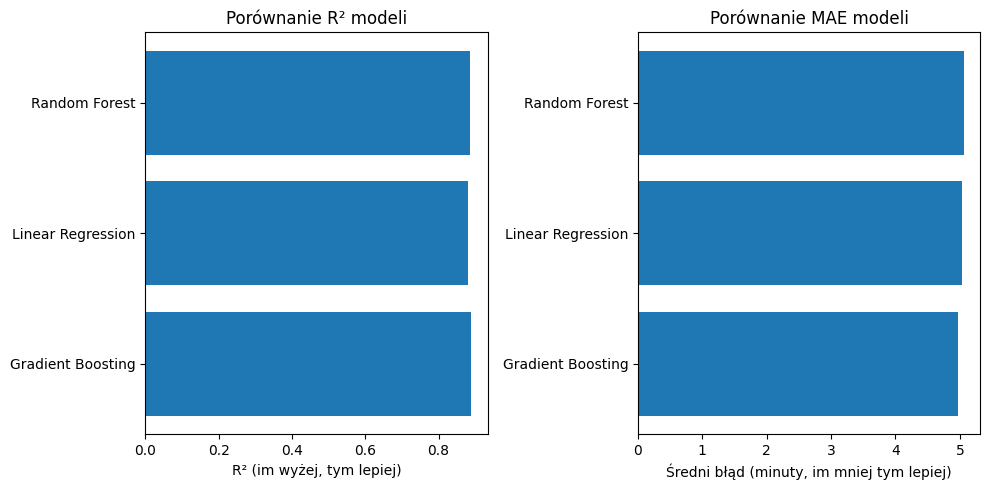

In [10]:
# Wizualizacja porównania
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.barh(results_df["Model"], results_df["R²"])
plt.xlabel("R² (im wyżej, tym lepiej)")
plt.title("Porównanie R² modeli")

plt.subplot(1,2,2)
plt.barh(results_df["Model"], results_df["MAE (minuty)"])
plt.xlabel("Średni błąd (minuty, im mniej tym lepiej)")
plt.title("Porównanie MAE modeli")

plt.tight_layout()
plt.show()

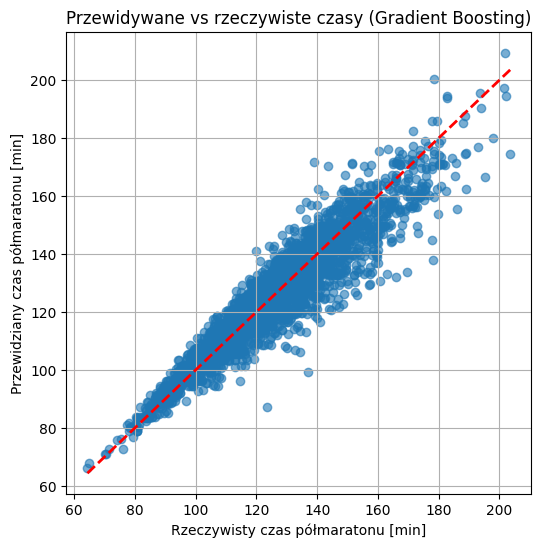

In [11]:
# Wykres przewidywania vs rzeczywistość
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # linia idealna
plt.xlabel("Rzeczywisty czas półmaratonu [min]")
plt.ylabel("Przewidziany czas półmaratonu [min]")
plt.title(f"Przewidywane vs rzeczywiste czasy ({best_model_name})")
plt.grid(True)
plt.show()

In [12]:
# Zapis najlepszego modelu do pliku
model_filename = "half_maraton_predictor_model.pkl"
joblib.dump(best_model, model_filename)

print(f"✅ Model '{best_model_name}' zapisany do pliku: {model_filename}")

✅ Model 'Gradient Boosting' zapisany do pliku: half_maraton_predictor_model.pkl


In [13]:
import joblib
import sklearn
import numpy as np

# Upewnij się, że kodowanie płci jest zgodne z aplikacją
# 0 = kobieta, 1 = mężczyzna
print(df["Płeć_encoded"].value_counts())

# Zapisz najlepszy model w nowym formacie
joblib.dump(best_model, "half_maraton_predictor_model_v2.pkl", compress=3)
print("✅ Model zapisany jako half_maraton_predictor_model_v2.pkl")

# Zapisz wersje bibliotek (dla pewności)
with open("model_info.txt", "w") as f:
    f.write(f"scikit-learn: {sklearn.__version__}\n")
    f.write(f"numpy: {np.__version__}\n")
    f.write(f"joblib: {joblib.__version__}\n")
print("📄 Zapisano plik model_info.txt z wersjami bibliotek.")

Płeć_encoded
0    12760
1     5167
Name: count, dtype: int64
✅ Model zapisany jako half_maraton_predictor_model_v2.pkl
📄 Zapisano plik model_info.txt z wersjami bibliotek.


In [14]:
# Zapisz istniejący best_model do pliku .pkl
joblib.dump(best_model, "half_maraton_predictor_model_v2.pkl")
print("✅ Model zapisany jako half_maraton_predictor_model_v2.pkl")

✅ Model zapisany jako half_maraton_predictor_model_v2.pkl
